In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
a = pd.read_csv('RFM.csv',encoding='unicode_escape')

In [3]:
df = a.copy()
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  Custom

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom


In [6]:
#recency

day = '2012-01-01'
day = pd.to_datetime(day)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

recency = df.groupby(['CustomerID']).agg({"InvoiceDate": lambda x:((day - x.max()).days)})

In [7]:
recency.head()

,InvoiceDate
CustomerID,
12346.0,347
12347.0,61
12348.0,97
12349.0,40
12350.0,332


In [8]:
print(recency['InvoiceDate'].min())
print(recency['InvoiceDate'].max())

21
718


In [9]:
df['InvoiceNo'].value_counts()
# as we can see the inoce number column doesnt have unique values

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [10]:
freq = df.drop_duplicates(subset = 'InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

In [11]:
freq.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [12]:
df[['CustomerID','InvoiceNo']].head()
# without finding the unique vlaues we see that there are multiple invoice numbers for same customer id 
# and we only need unique transactions to find the correct frequency

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365


In [13]:
df['total']= df['UnitPrice'] * df['Quantity']
monetary = df.groupby(['CustomerID'])[["total"]].sum()

In [14]:
monetary.head()
# find the total amount received from each customer

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [15]:
print(df['total'].max())
# gives the maximum amount received from different customers

168469.6


In [16]:
RFM = pd.concat([recency, freq, monetary],axis=1)
recency.columns = ['Recency']
freq.columns = ['Frequency']
monetary.columns = ['Monetary']
# here we simply merge the dataframes we just created into one single dataframe

In [17]:
RFM.head()

,InvoiceDate,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,61,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [18]:
RFM.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency','total':'Monetary'},inplace = True)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)
# here we standardized the mean also known as z-score normalization, of all the 3 features
# here we ensure the mean = 0 and stdev = 1, so that each features contribute equally to the dataset/analysis

In [20]:
scaled

array([[ 1.97520461, -0.32936215, -0.23100099],
       [-0.53535955,  0.20610242,  0.29343167],
       [-0.21934448, -0.11517632, -0.01231622],
       ...,
       [-0.07011514, -0.22226923, -0.20951263],
       [-0.79870544,  1.16993863,  0.02390005],
       [-0.8864874 , -0.22226923, -0.00744423]])

In [21]:
from sklearn.cluster import KMeans

inertia = []

for i in np.arange(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_) 

print(inertia)
# the inertia here can be understood as the error of the model, so lower the intertia the beter our 
# model is. And the range here is 1 to 11 to explore a reasonable number of clusters that is
# all the data points could be in one cluster all the way up to 10 clusters

[13116.000000000011, 9137.185402871077, 6000.963106414636, 4521.259364584749, 3493.7136387674773, 2815.7484974898102, 2165.135970155612, 1824.2311825032739, 1510.1267989339976, 1272.0829229950891]


In [22]:
min(inertia)

1272.0829229950891

In [23]:
max(inertia)

13116.000000000011

In [24]:
type(inertia)

list

In [25]:
len(inertia)

10

In [26]:
a = len(inertia)
x = []
for i in range(0,a):
    x.append(i)

In [27]:
len(x)

10

In [28]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

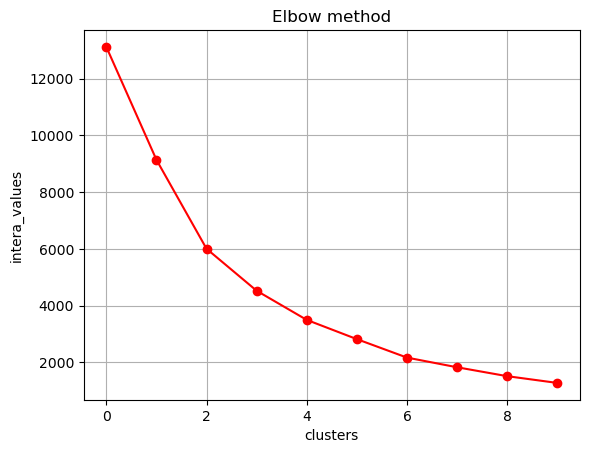

In [29]:
plt.plot(x,inertia,marker='o',color = 'red')
plt.xlabel('clusters')
plt.ylabel('intera_values')
plt.title('Elbow method')
plt.grid(True)
plt.show()
# analyzing the below plot one could somewhat say that a reasonable elbow point or best number
# of clusters is 2 or 3

In [30]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['clusters'] = (kmeans.labels_ +1)
# we assign the labels to the clusters like cluster1,cluster2 and cluster3
# and to make the numbers = 1,2,3 and get a better  intution we add 1 to the labels otherwise for the clusters the label
# range would have been(0,1,2)

In [31]:
RFM.head()

,Recency,Frequency,Monetary,clusters
CustomerID,,,,
12346.0,347,2,0.00,2
12347.0,61,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2


In [32]:
final = RFM.groupby('clusters')['Recency', 'Frequency', 'Monetary'].mean()
final
# this displays the average RFM for each cluster

,Recency,Frequency,Monetary
clusters,,,
1,67.024186,5.693953,1839.244628
2,281.558719,1.627224,432.630934
3,30.608696,86.869565,81835.857391


In [33]:
def func(row):
    if row['clusters'] == 1:
        return 'Alpha'
    elif row['clusters'] == 3:
        return 'Beta'
    else :
        return 'Gamma'
# assigning different groups    

In [34]:
RFM['group'] = RFM.apply(func,axis = 1)
# grouping the data by the 3 different clusters

In [35]:
output = RFM['group'].value_counts()
output

Alpha    3225
Gamma    1124
Beta       23
Name: group, dtype: int64

<Axes: >

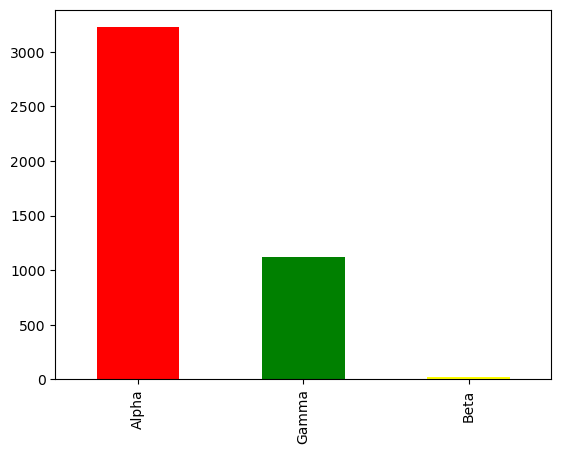

In [36]:
output.plot(kind = 'bar', color = ['red','g','yellow'])

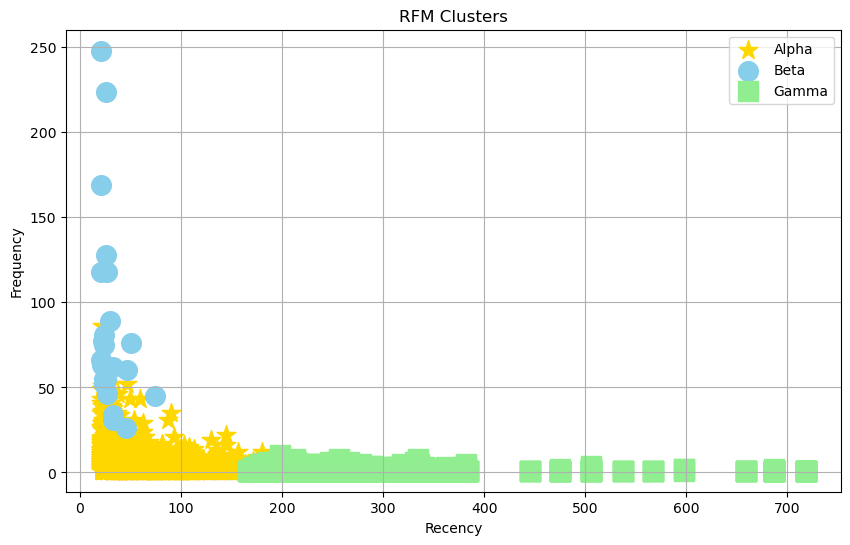

In [37]:
import matplotlib.pyplot as plt

# Define colors and markers for each cluster
cluster_colors = {'Alpha': 'gold', 'Beta': 'skyblue', 'Gamma': 'lightgreen'}
cluster_markers = {'Alpha': '*', 'Beta': 'o', 'Gamma': 's' }

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster, color in cluster_colors.items():
    plt.scatter(RFM.loc[RFM['group'] == cluster, 'Recency'], 
                RFM.loc[RFM['group'] == cluster, 'Frequency'],
                label=cluster,
                color=color,
                marker=cluster_markers[cluster],
                s=200)  # Adjust size for markers

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
colors = []
for x,y in cluster_colors.items():
    colors.append(y)
    print(x)
    print(y)

Alpha
gold
Beta
skyblue
Gamma
lightgreen


In [39]:
RFM.head()

,Recency,Frequency,Monetary,clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,2,Gamma
12347.0,61,7,4310.00,1,Alpha
12348.0,97,4,1797.24,1,Alpha
12349.0,40,1,1757.55,1,Alpha
12350.0,332,1,334.40,2,Gamma


In [40]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [41]:
Ra = []
Fa = []
Ma = []
for i in range(len(RFM)):
    if RFM['group'].iloc[i] == 'Alpha':
        Ra.append(RFM['Recency'].iloc[i])
        Fa.append(RFM['Frequency'].iloc[i])
        Ma.append(RFM['Monetary'].iloc[i])
# plotting the cluster for only one group that is alpha

In [42]:
Ra = np.array(Ra)
Fa = np.array(Fa)
Ma = np.array(Ma)

<IPython.core.display.Javascript object>


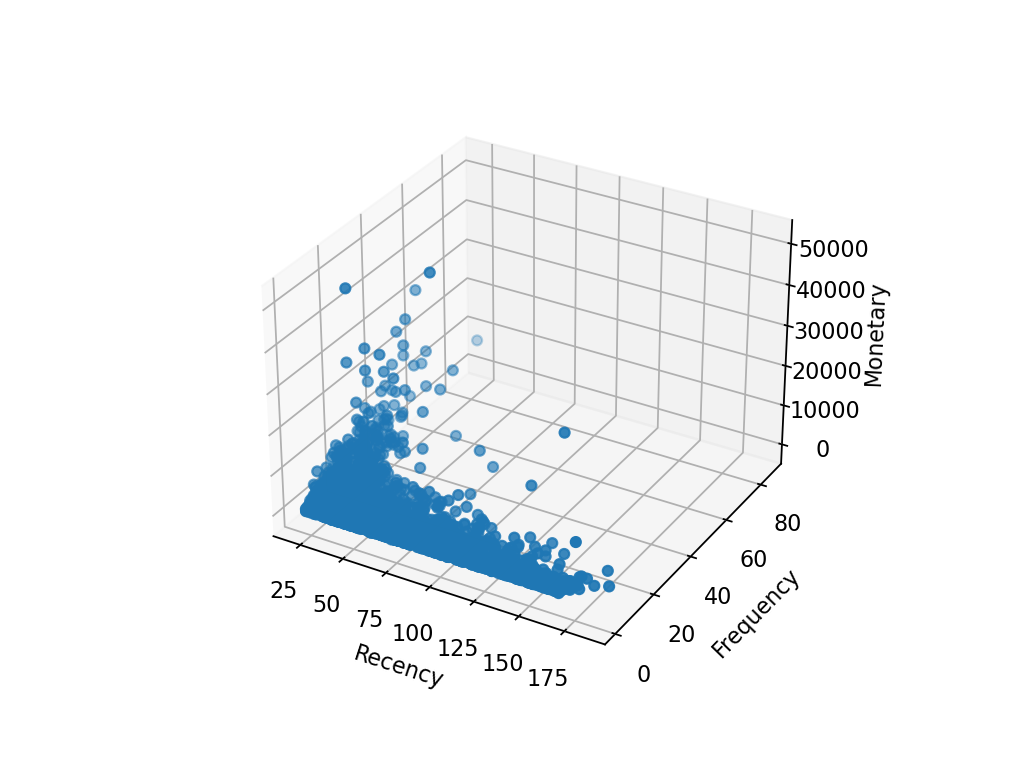

In [43]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(Ra,Fa,Ma) #x,y,z
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# ax.title('group-Alpha')
plt.show()
# here we only plot the data for alpha group

<IPython.core.display.Javascript object>


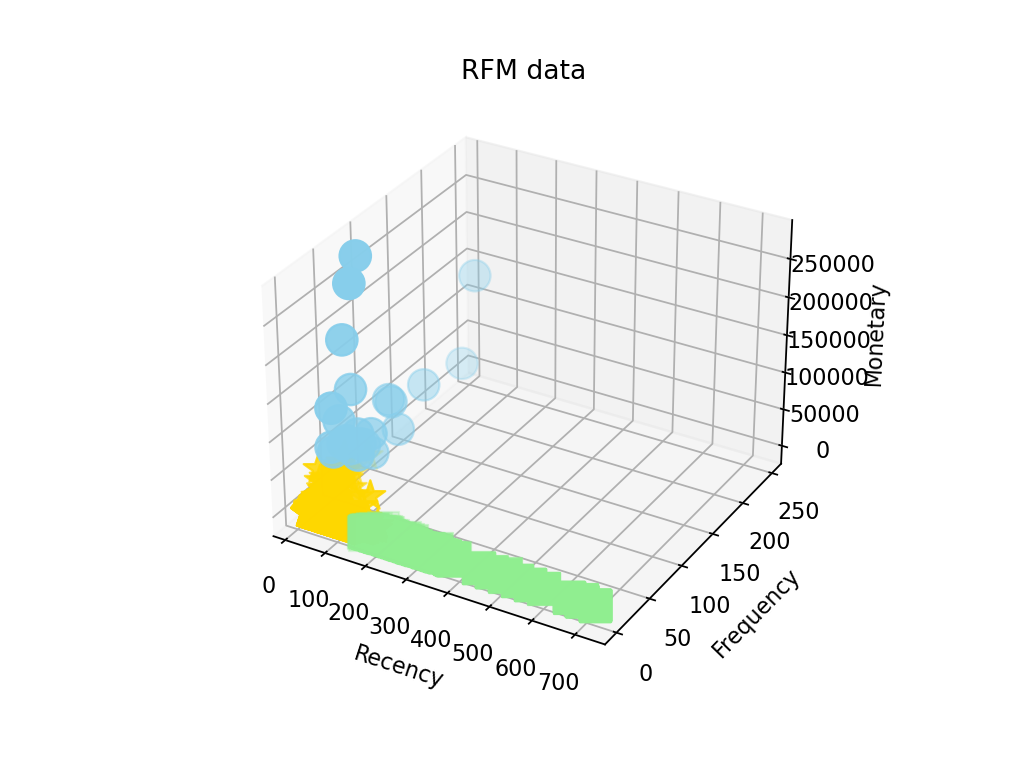

In [44]:
cluster_colors = {'Alpha': 'gold', 'Beta': 'skyblue', 'Gamma': 'lightgreen'}
cluster_markers = {'Alpha': '*', 'Beta': 'o', 'Gamma': 's' }

fig = plt.figure()
ax = plt.axes(projection = '3d')
for cluster, color in cluster_colors.items():
    ax.scatter3D(RFM.loc[RFM['group'] == cluster, 'Recency'], 
                RFM.loc[RFM['group'] == cluster, 'Frequency'], 
                RFM.loc[RFM['group'] == cluster, 'Monetary'],
                label=cluster,
                color=color,
                marker=cluster_markers[cluster],
                s=200)  # Adjust size for markers
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM data')

plt.show()
#  we pretty much use the same code as above to differnciate the clusters on basis of their colours